# K-Means-Clustering

## Unüberwachtes Lernen: Clustering
    
Diese Woche liegt der Fokus auf dem Gebiet des unüberwachten Lernens. Wir werden mit Methoden des unüberwachten Lernens (engl. unsupervised learning) wie z. B. Clustering arbeiten. Sie werden (optional) lernen, warum und wie wir die Dimensionalität der Originaldaten reduzieren können und was die wichtigsten Ansätze zur Gruppierung ähnlicher Datenpunkte sind.  


### Einführung

Bislang haben wir Methoden des maschinellen Lernens weitgehend im Kontext des _überwachten_ Lernens vorgestellt.  Das heißt, wir haben über Datensätze für maschinelles Lernen gesprochen, die Eingaben $x$ und Ausgaben $y$ haben. Dabei ist das Ziel eines Algorithmus für maschinelles Lernen, zu lernen, wie man $y$ aus $x$ vorhersagen kann. Überwachtes Lernen dominiert traditionell die Mehrheit der praktischen Data-Science-Anwendungen. Aber in dieser Aufgabe werden wir Ansätze diskutieren, die von diesen abweichen. Insbesondere werden wir die Funktion des unüberwachten Lernens betrachten, bei dem uns _nicht_ entsprechende Eingabe/Ausgabe-Paare gegeben sind, sondern bei dem uns _nur_ die Eingaben $x$ gegeben sind. Im Vergleich zu Klassifizierungs- und Regressionsmethoden besteht der Grundsatz darin, dass die Eingabedaten unbeschriftet sind (d. h. es sind keine Labels oder Klassen gegeben). Das wirft natürlich die offensichtliche Frage auf: Wenn uns keine Zielausgabe gegeben wird, was genau sollen wir dann vorhersagen? Und tatsächlich ist die Aufgabe des unüberwachten Lernens auf einer gewissen Ebene mehrdeutig. Die allgemeine Philosophie des unüberwachten Lernens ist jedoch, dass wir eine Art von Struktur in den Daten entdecken wollen und dass der Algorithmus die Struktur der Daten ohne jegliche Hilfe erlernt. Verschiedene Methoden des unüberwachten Lernens arbeiten auf sehr unterschiedliche Weise und entdecken sehr unterschiedliche Arten von Strukturen, aber sie haben alle dieses ähnliche Element. 

<div class="alert alert-block alert-success">
<b>Frage 3.4.1:</b> Was sind die beiden Hauptunterschiede hinsichtlich Datenerstellung und Training/Auswertung zwischen überwachtem und unüberwachtem Lernen?
Tipp: Denken Sie an die Eingabe und Ausgabe der beiden Kategorien!
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Beim überwachten Lernen sind die Daten gelabelt, bzw. gehören einer Klasse an. Beim unüberwachten Lernen sollen Strukturen erkannt werden - Interpretationsaufgabe. Die Daten können auch reduziert werden.</div>


## Clustering 

In der vorherigen Teilaufgabe haben wir eine Kategorie von Modellen für unüberwachtes maschinelles Lernen untersucht: Die Dimensionalitätsreduktion. Nun werden wir zu einer anderen Klasse von unüberwachten maschinellen Lernmodellen übergehen: Clustering-Algorithmen. Die Hauptidee hinter Clustering ist ziemlich einfach. Clustering-Algorithmen versuchen, aus den Eigenschaften der Daten eine optimale Einteilung oder diskrete Kennzeichnung von Punktgruppen zu lernen. Im Grunde genommen sagen wir uns: "Ich habe hier diese Punkte, und ich denke, dass sie sich in Gruppen organisieren. Es wäre schön, diese Dinge konkreter zu beschreiben und, wenn ein neuer Punkt hinzukommt, ihn der richtigen Gruppe zuzuordnen." Diese allgemeine Idee ermutigt zur Exploration und eröffnet eine Vielzahl von Algorithmen für das Clustering.
<br>
<br>
<figure><img align="center" src="https://habrastorage.org/getpro/habr/post_images/8b9/ae5/586/8b9ae55861f22a2809e8b3a00ef815ad.png"></figure>
Beispiele für Ergebnisse von verschiedenen Algorithmen aus scikit-learn

Die oben aufgeführten Algorithmen decken nicht alle Clustering-Methoden ab, aber sie sind die am häufigsten verwendeten. Heute werden wir näher auf das K-Means-Clustering eingehen, welches der beliebteste Clustering-Algorithmus ist.

### K-means clustering


Als erstes Beispiel für einen unüberwachten Lernalgorithmus im Bereich des Clustering betrachten wir den K-Means-Clustering-Algorithmus. Der k-means-Algorithmus ist der beliebteste und gleichzeitig einfachste aller Clustering-Algorithmen. Bevor wir jedoch die formale Definition und Funktion vorstellen, betrachten wir das k-means Clustering aus einem eher visuellen/geometrischen Blickwinkel. Einfach als eine Möglichkeit, Datenpunkte zu clustern. Das Ziel des k-means-Algorithmus ist es, eine Menge von $k$ "Zentren" innerhalb eines unbeschrifteten mehrdimensionalen Datensatzes zu finden (d. h. Punkte $\mu^{(i)} \in \mathbb{R}^n)$, wobei $k$ eine vorher festgelegte Zahl ist. Dies wird durch eine einfache Vorstellung davon erreicht, wie das optimale Clustering aussieht:

- Das "Clusterzentrum" ist das arithmetische Mittel aller zum Cluster gehörenden Punkte.
- Jeder Punkt ist näher an seinem eigenen Clusterzentrum als an anderen Clusterzentren.

Diese beiden Annahmen sind die Grundlage des **k**-Mittelwertmodells. Auf diese Weise können wir auch jeden Punkt mit seinem nächstgelegenen Zentrum assoziieren und dies als Hinweis darauf verwenden, zu welchem Cluster er gehört. Mit einem *k*-Means-Modell sind wir also auch in der Lage, neue Datenpunkte zu klassifizieren.

Und so funktioniert es:

**Algorithmus**: K-means

**Gegeben:** Datensatz $x^{(i)}, i=1,\ldots,m$

**Initialisieren Sie:**
1. Wählen Sie die Anzahl von Clustern $k$, die Sie für optimal halten.  
   
2. Initialisieren Sie $k$ Punkte als "Zentroide" zufällig im Raum unserer Daten.  
    $\mu^{(j)} := (x^{(1:m)}), \; j=1,\ldots,k$  

**Wiederholen Sie den Vorgang bis zur Konvergenz:**
3. Ordnen Sie jede Beobachtung ihrem nächstgelegenen Schwerpunkt zu.  
    $y^{(i)} := argmin_j \|\mu^{(j)} - x^{(i)}\|_2^2, \; i=1,\ldots,m$
4. Aktualisieren Sie die Zentroide auf den Mittelpunkt aller zugewiesenen Beobachtungssätze.   
    $\displaystyle \mu^{(j)} := \sum_{i=1}^m \frac{x^{(i)} \mathrm{1}\{y^{(i)} = j\}}{\mathrm{1}\{y^{(i)} = j\}}, \;\; j=1,\ldots,k$
5. Wiederholen Sie die Schritte 3 und 4 bis alle Zentroide stabil sind (d. h. sich in Schritt 4 nichts mehr ändert).

Was ist die _Verlustfunktion_, die wir hier optimieren? Es ist die Summe der Abstände jedes Punktes zu seinem nächstgelegenen Schwerpunkt. Obwohl wir dies hier nicht formal beweisen werden, steht fest, dass der Algorithmus bei jedem Schritt die Verlustfunktion _verringert_ (die Intuition ist, dass jeder Schritt, sowohl die Neuzuordnung von Clustern als auch die Berechnung neuer Zentren, nur den Gesamtverlust verringern kann, und daher wird der Gesamtverlust nur auf diese Weise verringert).  Da es außerdem nur eine endliche Anzahl möglicher Clusterungen gibt (natürlich exponentiell groß, aber immer noch endlich), wissen wir, dass der Algorithmus nach einer endlichen Anzahl von Schritten konvergiert (d. h. die Clusterzuweisungen bleiben von einer Iteration zur nächsten konstant, was bedeutet, dass sich die Zentren ebenfalls nicht ändern und der Algorithmus einen Fixpunkt erreicht hat).


In der folgenden Abbildung können Sie sehen, was in jeder Iteration des k-Means-Algorithmus passieren sollte. 
<figure><img align="center" src="images/expectation-maximization.png"></figure>

### Entwickeln einer einfachen k-Means-Implementierung
Zunächst einmal müssen wir alle benötigten Bibliotheken und unsere Daten laden. Wir beginnen mit den Standard-Importen: numpy, pyplot, seaborn und scikitlearn-datasets.

In [1]:
# Import numpy, pyplot, datasets
import os
os.environ["OMP_NUM_THREADS"] = '2'
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display
import ipywidgets as widgets
# plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'



Als nächsten Schritt wollen wir einen zweidimensionalen Datensatz erzeugen, der vier verschiedene Blobs enthält. Wir werden den folgenden Satz von 300 Datenpunkten verwenden. Um zu verdeutlichen, dass es sich um einen unüberwachten Algorithmus handelt, lassen wir die Beschriftungen in der Visualisierung weg.

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.3:</b> Füllen Sie den folgenden Code aus, um eine einfache Implementierung von k-Means selbst zu schreiben!
<ul>
<li> Initialisieren Sie k Punkte als "Zentroide" zufällig mit RandomState
<li> Dann wiederholen Sie die Schrittzuweisung, aktualisieren die Zentroide und prüfen die Konvergenz

</li>
</ul>
</div>

In [2]:
# use the following import to simplify the implementation
from sklearn.metrics import pairwise_distances_argmin,pairwise_distances
# 1. Select the number of clusters: This has to be done before the function is called
# rseed is the seed for generation of random numbers

max_iter=1000
tol=1e-4

def find_clusters(X: np.ndarray, n_clusters: int, rseed: int):
    
    # 2. Initialize k points as "centroids" randomly 
    # Please initialize the random number generator with specified random state
    # STUDENT CODE HERE
    rng = np.random.RandomState(rseed)
    centers = X[rng.choice(len(X), n_clusters, replace=False)]#np.zeros((n_clusters,2))
    
    for i in range(max_iter):
        # Zuordnung der Datenpunkte zu den nächsten Zentren
        labels= pairwise_distances_argmin(X, centers)
        
        # Neue Zentren berechnen
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])
        
        # Überprüfung auf Konvergenz
        shift = np.linalg.norm(new_centers - centers)
        if shift < tol:
            print(f"Konvergenz nach {i} Iterationen erreicht.")
            break
        centers = new_centers
    # STUDENT CODE until HERE    
    # return the cluster centers and the labels
    return centers, labels



#### Analysieren von Blob-Daten

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.4:</b> Verwenden Sie Ihre Funktion, um ein Clustering der oben erzeugten Daten zu berechnen. Der zufällige Seed ist bereits festgelegt. Visualisieren Sie die gefundenen Clusterbeschriftungen mit verschiedenen Farben. Da wir die Daten selbst generiert haben, wissen wir, wie viele Cluster wir finden wollen. Welchen Wert müssen wir also für k angeben?


</div>

Konvergenz nach 9 Iterationen erreicht.
[[ 9.6290191  -9.800363  ]
 [ 9.49378092  2.64630988]
 [ 3.87820608 -5.33258785]
 [ 4.3092231  -6.48958445]]


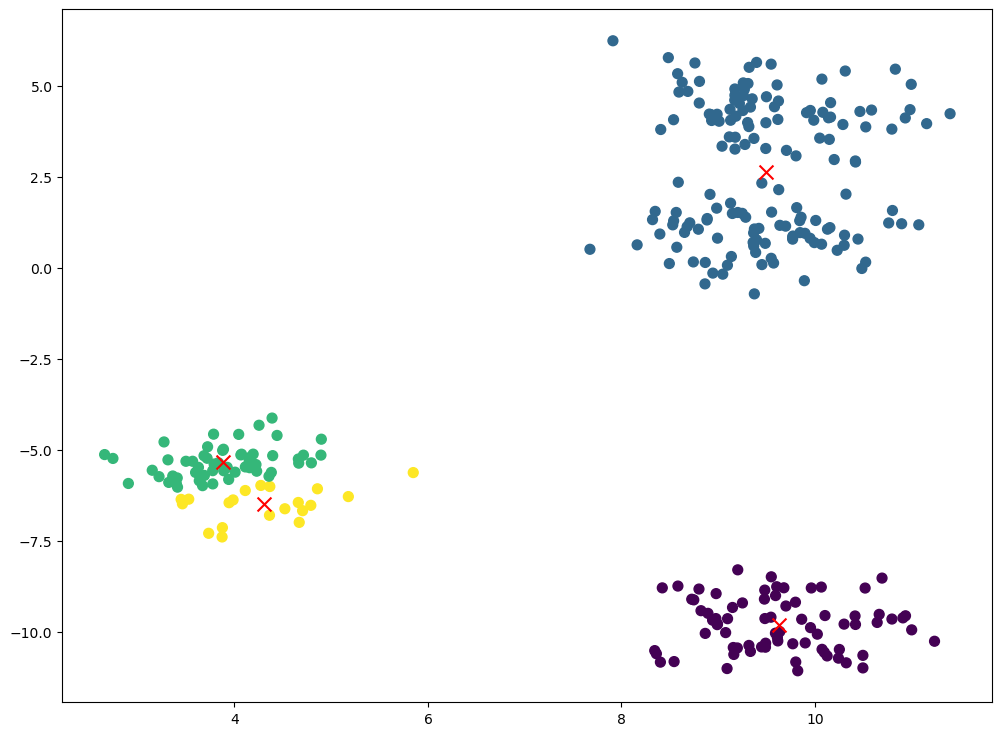

In [3]:
from sklearn.datasets import make_blobs
RANDOM_STATE = 4
n_cluster=4
# STUDENT CODE HERE

X_blob, y_blob = make_blobs(
    n_samples=300, centers=n_cluster,cluster_std=0.70, random_state=RANDOM_STATE, shuffle=True
)

centers, labels_blob=find_clusters(X_blob,n_cluster,RANDOM_STATE)
print(centers)
plt.scatter(X_blob[:, 0],X_blob[:, 1],c=labels_blob, cmap='viridis', s=50)
plt.scatter(centers[:,0],centers[:,1],marker='x',color="red",s=100)
plt.show()

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage 3.4.5:</b> Experimentieren Sie mit dem Zufallsgenerator. Was beobachten Sie? Was könnten wir tun, um dies zu überwinden?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Je nachdem wie das Random Seed gewählt wird, entstehen unterschiedliche Blobs und auch Anfangsschätzungen</div>


#### Analysieren eines weiteren synthetischen Datensatzes
Wir haben unseren ersten Datensatz mit der Funktion *make_blobs* erzeugt. Um ein besseres Gefühl für die Eigenschaften von k-Means zu bekommen, wollen wir die Ergebnisse mit einem weiteren Datensatz analysieren. Wir importieren die Funktion *make_moons* aus sklearn datasets und erzeugen einen weiteren Datensatz, bestehend aus 300 Datenpunkte. Der Rauschwert $0.05$, um eine gewisse Abweichung in unserem Datensatz einzubeziehen.



<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.6:</b> Verwenden Sie Ihre Funktion zum Clustern der Daten und suchen Sie nach zwei Clustern. Zeigen Sie das Ergebnis in einem Streudiagramm.

</div>

Konvergenz nach 8 Iterationen erreicht.


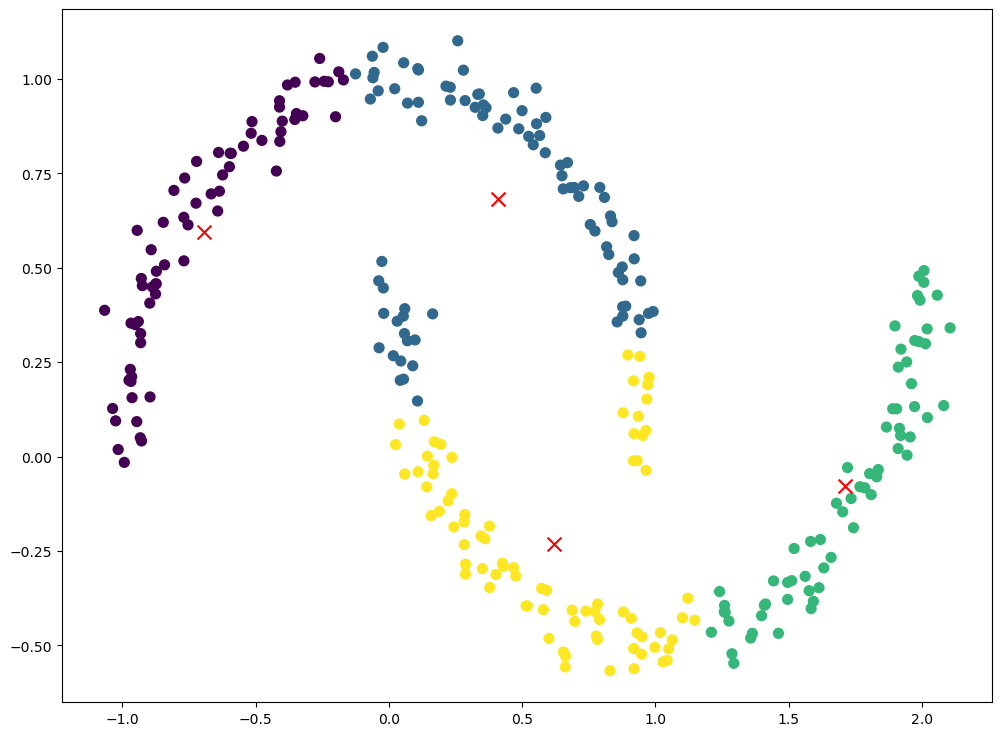

In [4]:
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(300, noise=.05, random_state=RANDOM_STATE)
# STUDENT CODE HERE
centers, labels=find_clusters(X_moon,n_clusters=4,rseed=1)
plt.scatter(X_moon[:, 0],X_moon[:, 1],c=labels, cmap='viridis', s=50)
plt.scatter(centers[:,0],centers[:,1],marker='x',color="red",s=100)
plt.show()
# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.7:</b> Was fällt Ihnen auf? Können Sie erklären, warum dies geschieht? Welche Bedingung des k-Means-Algorithmus führt zu diesem Ergebnis?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Es werden falsche Cluster erkannt. Das liegt daran, dass immer die Abstände zu einem Mittelwert und nicht zu den restlichen Datenpunkten betrachtet wird.</div>


<div class="alert alert-block alert-success">
<b>Frage 3.4.8:</b> Was passiert, wenn wir den Wert von k auf vier statt auf zwei setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Die Menge wird in 4 Cluster geteilt die Daten aus verschiedenen Halbmonden beinhalten.</div>


Ob das Ergebnis aussagekräftig ist, ist eine Frage, die schwer zu beantworten ist. In den folgenden Aufgaben werden wir verschiedene Ansätze kennenlernen.

### Evaluieren eines Clusterings

Wie bereits zu Beginn der heutigen Session erwähnt, ist die Auswertung von Clustering-Ergebnissen schwierig. Bei den synthetischen Datensätzen, die wir oben erzeugt haben, haben wir gelabelte Daten, da die Blobs / Monde als vorgegebene Klassen (Cluster) gesehen werden können. Wir können die Übereinstimmung unserer Clustering-Ergebnisse mit dem gegebenen Label überprüfen. Aber im Allgemeinen verwenden wir unüberwachte Methoden, wenn wir keine Labels für unsere Daten haben. Was können wir also tun, wenn es kein Label zum Überprüfen gibt? Wir sind nur dann in der Lage, unser Clustering zu evaluieren, wenn wir ein Maß für die Qualität eines Clusterns definieren können. Die Auswertung eines Clustering gibt Aufschluss darüber, nach wie vielen Clustern gesucht werden soll. Es gibt *interne* und *externe* Gütemetriken. Externe Metriken verwenden die Informationen über die bekannte wahre Aufteilung (wir haben Labels), während interne Metriken keine externen Informationen verwenden und die Güte von Clustern nur auf Basis der Ausgangsdaten bewerten. Die optimale Anzahl von Clustern wird normalerweise in Bezug auf einige interne Metriken definiert. 

#### Verwenden von gegebenen Labels in einer einfachen Tabelle
Zunächst verwenden wir die gegebenen Informationen der Labels. Zu diesem Zweck können wir die __cross-tabulation__ verwenden, die eine Methode zur quantitativen Analyse der Beziehung zwischen mehreren Variablen bereitstellt. In unserem Fall sind die beiden Variablen unsere Labels und die geschätzten Cluster.

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.9:</b> 
<ul>
<li> Abrufen der Listen der Clustering-Ergebnisse für den Blob-Datensatz und die Label Daten
<li> Verwenden Sie die Bibliothek *pandas*, um die cross-tabulation durchzuführen.
<li> Setzen Sie den Index und die Spalten der Tabelle richtig. Der Index sollte den echten / realen Cluster anzeigen, und die Spalte sollte beschreiben, welchem Cluster die Punkte zugeordnet wurden.
</li>
</ul>
</div>

In [5]:
# STUDENT CODE HERE
pd.crosstab(y_blob,labels_blob)
# STUDENT CODE until HERE

col_0   0   1   2   3
row_0                
0       0  75   0   0
1       0  75   0   0
2       0   0  55  20
3      75   0   0   0

<div class="alert alert-block alert-success">
<b>Fragen 3.4.10:</b> Entsprechen die Cluster den realen Klassen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Je nach Random seed ensprechen die k-means Klassen den vorgegebenen Labels. Aber die Reihenfolge der Klassen hat sich geändert</div>


#### Messung der Clustering-Qualität ohne Etiketten: Silhouetten-Koeffizient

Im Gegensatz zu der oben beschriebenen Metrik impliziert der Silhouettenkoeffizient nicht das Wissen über die wahren Labels der Objekte. Er ermöglicht es uns, die Qualität des Clustering nur anhand der anfänglichen, nicht gelabelten Datenpunkte und des Clustering-Ergebnisses zu schätzen. Zu Beginn wird für jede Beobachtung der Silhouettenkoeffizient berechnet. Sei $a$ der Mittelwert des Abstands eines Objekts zu anderen Objekten innerhalb eines Clusters und $b$ der mittlere Abstand eines Objekts zu Objekten des nächstgelegenen Clusters (der sich von dem unterscheidet, zu dem das Objekt gehört). Dann sei das Silhouettenmaß für dieses Objekt $$s = \frac{b - a}{\max(a, b)}.$$

Die Silhouette eines Datenpunktes ist ein Mittelwert der Silhouettenwerte aus diesem Datenpunkt. Der Silhouettenabstand zeigt also an, wie stark sich der Abstand zwischen den Objekten der gleichen Klasse vom mittleren Abstand zwischen den Objekten aus verschiedenen Clustern unterscheidet. Dieser Koeffizient nimmt Werte im Bereich $[-1, 1]$ an. Werte nahe bei -1 entsprechen schlechten Clustering-Ergebnissen, während Werte näher bei 1 dichten, gut definierten Clustern entsprechen. Je höher also der Silhouettenwert ist, desto besser sind die Ergebnisse des Clusterns.

<div class="alert alert-block alert-success">
<b>Frage 3.4.11:</b> Berechnen Sie den Silhouettenkoeffizienten und erhalten Sie das Ergebnis für die oben ausgewählten Blobdaten mit dem entsprechenden Wert für k. Welche Schlussfolgerung können wir hier ziehen? Tipp: Verwenden Sie die scikit-learn-Bibliothek für die Berechnung.
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Der score von 0.6 deutet darauf hin, dass viele Punkte zwischen zwei Clustern liegen (0.5) </div>


In [6]:
# STUDENT CODE HERE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_score(X_blob, labels_blob)
# STUDENT CODE until HERE

0.6739661787526845

### Clustering mit scikit-learn Implementation

Nachdem wir unsere eigene Implementierung von K-means analysiert haben, können wir nun die von scikit-learn vorgegebene Implementierung verwenden. Das eingebaute K-Means verwendet standardmäßig die Initialisierung von KMeans++. Weitere Details zu dieser Initialisierungsprozedur finden Sie im Anhang. Um konsistente und reproduzierbare Ergebnisse zu erhalten, müssen wir nur den Zufallszustand angeben, wie wir es in unserer eigenen Version getan haben. Ein Vorteil von scikit-learn ist, dass wir mit einer eingebauten Funktion direkt Cluster-Labels für neue Datenpunkte schätzen können. Dabei werden die neuen Datenpunkten den vorhandenen Clustern zugeordnet. Da sich k-means den Mittelwert jedes Clusters (die "Zentroide") merkt, ist es möglich, zu jeder neuen Probe den nächstgelegenen Zentroid zu finden und das entsprechende Label zuzuweisen.

Nun beginnen wir, die Ergebnisse von oben mit scikit-learn zu reproduzieren. Wir werden auswerten, ob wir im Blob-Datensatz die gleichen Cluster wie zuvor finden.


<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.12:</b> 
<ul>
<li> Importieren Sie KMeans aus sklearn.cluster.
<li> Erstellen Sie mit <code>KMeans()</code> eine KMeans-Instanz, um die richtige Anzahl von Clustern zu finden. Um die Anzahl der Cluster anzugeben, verwenden Sie das Schlüsselwort-Argument n_clusters.
<li> Verwenden Sie die Methode <code>.fit()</code> von model, um das Modell an das Array von Punkten anzupassen.
<li> Verwenden Sie die Methode <code>.predict()</code> des Modells, um die Cluster-Labels unseres Datensatzes vorherzusagen, und weisen Sie das Ergebnis den Labels zu
</li>
</ul>
</div>

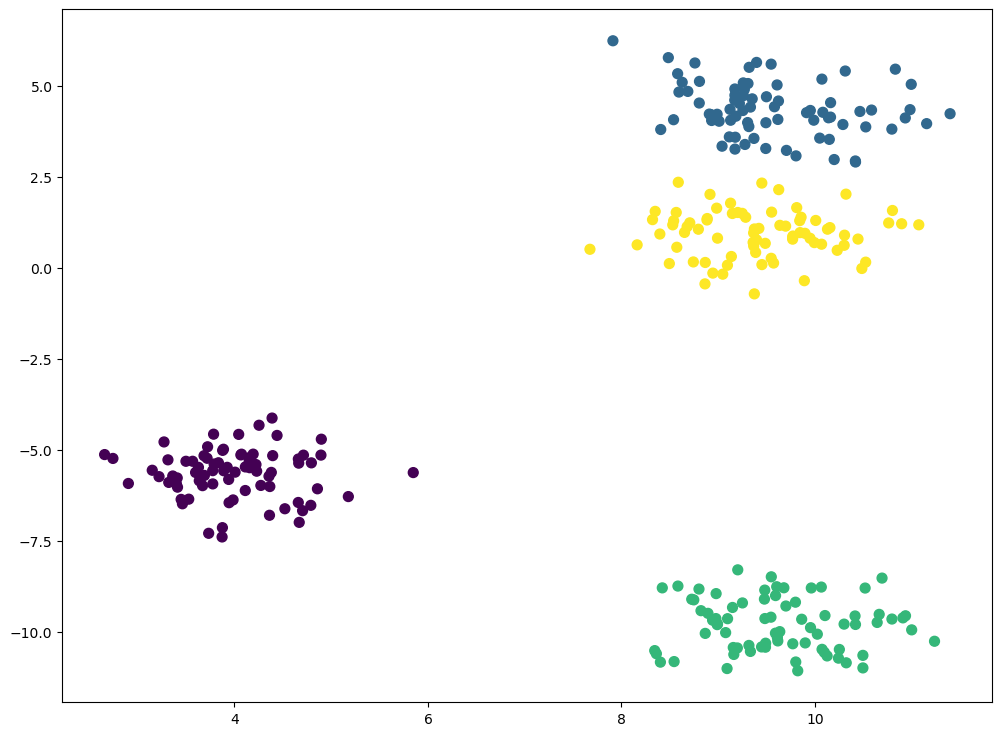

In [7]:
# STUDENT CODE HERE
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=4).fit(X_blob)
labels_blob=kmeans.predict(X_blob)
# STUDENT CODE until HERE
#plotting is given
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels_blob,
            s=50, cmap='viridis')
plt.show()

<div class="alert alert-block alert-success">
<b>Frage 3.4.13:</b> Was beobachten Sie? Welchen Unterschied können Sie erkennen, wenn Sie die Ergebnisse unserer eigenen Implementierung und der scikit-learn-Lösung vergleichen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Das obere rechte Cluster wird diesmal als 2 Cluster erkannt. Dafür wird das linke untere als eines erkannt. </div>


### Wählen Sie einen geeigneten Wert für $k$
Eine offensichtliche Frage, die sich bei der Verwendung von K-Means stellt, ist: Wie wählt man die Hyperparameter für den Algorithmus, wie z. B. die Anzahl der Zentren $k$? Im Allgemeinen haben wir nur die Datenpunkte und den Cluster, dem sie zugeordnet sind. Nun brauchen wir ebenso Metriken, die von den Datenpunkten abhängen, um den perfekten Wert für $k$ auszuwählen.



#### Verwendung des Silhouette-Koeffizienten
Eine Möglichkeit ist die Verwendung des Silhouettenkoeffizienten, den wir oben eingeführt haben. Mit Hilfe der Silhouette können wir die optimale Anzahl von Clustern $k$ identifizieren (wenn wir sie nicht schon aus den Daten kennen), indem wir die Anzahl von Clustern nehmen, die den Silhouettenkoeffizienten maximiert. 


<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.14:</b> Berechnen Sie den Silhouettenkoeffizienten für verschiedene Werte von k und wählen Sie die optimale Zahl! Der Code zum Plotten verschiedener ks (eine Reihe von k-Hyperparametern) versus dem Score wurde für Sie bereits geschrieben, füllen Sie also nur noch den Rest des Codes aus.


</div>

In [8]:
def calculate_k_silhouette(X:np.ndarray, k_min:int, k_max:int):
    # STUDENT CODE HERE
    scores=[]
    for k in range(k_min,k_max+1):
        kmeans=KMeans(n_clusters=k,random_state=4).fit(X)
        labels_blob=kmeans.predict(X)
        scores.append(silhouette_score(X, labels_blob))
    ks=np.arange(k_min,k_max+1)
    # STUDENT CODE until HERE
    return ks, scores

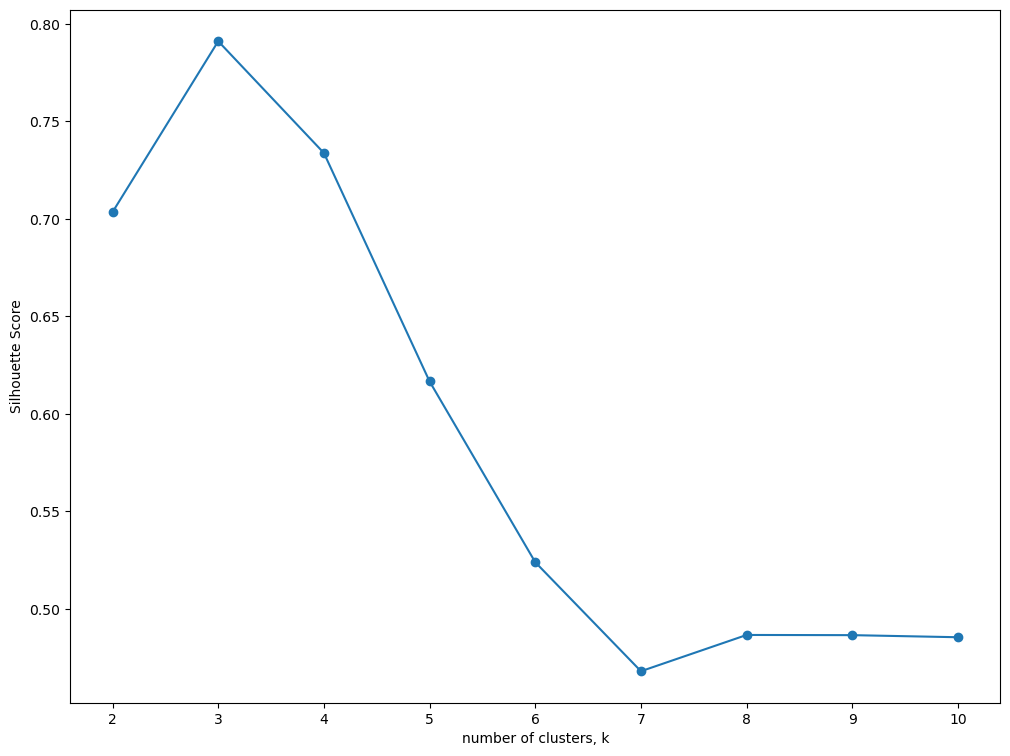

In [9]:
#set random state
RANDOM_STATE = 42
# call your function with a suitable range for k
# STUDENT CODE HERE
ks,silhouette_scores=calculate_k_silhouette(X_blob,2,10)
# STUDENT CODE until HERE
# Plot ks vs silhouette coefficient
plt.plot(ks, silhouette_scores, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.show()

<div class="alert alert-block alert-success">
<b>Frage 3.4.15:</b> Welche Anzahl von Clustern sollten wir entsprechend dem Silhouetten-Score wählen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b>3 Cluster wären ideal</div>


#### Verwendung der Ellenbogenmethode
Ein gutes Clustering hat enge Cluster und die Datenpunkte in jedem Cluster sind zusammengeballt. Daher können wir die Streuung jedes Clusters bewerten, wobei eine geringere Streuung besser ist. K-means optimiert von Natur aus die Summe der quadratischen Abstände zwischen den Beobachtungen und ihren Zentren. Dies ist die *Verlustfunktion* für den k-Means-Algorithmus. 

$$ J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$




Wir können die Verlustfunktion als Qualitätsmaß verwenden. Das scheint vernünftig zu sein -- wir wollen, dass unsere Beobachtungen so nah wie möglich an ihren Zentren liegen. Bewerten Sie nun, was das Qualitätsmaß über die Verlustfunktion für verschiedene Werte von $k$ anzeigt!

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.16:</b> Der Code zum Plotten verschiedener ks gegen den Verlust wurde bereits für Sie geschrieben, füllen Sie also den Rest des Codes aus. Die wichtigsten Schritte sind:
<ul>
<li> Definieren Sie die Liste der k-Werte
<li> Führen Sie für jeden der Werte von k die folgenden Schritte aus:
    <ul>
        <li>1. Anpassen eines K-Means-Modells an die gegebenen Datenproben mit k Clustern 
        <li>2. Berechnen Sie den Verlust
</li>
</ul>
</li>
</ul>
</div>

In [10]:
def calculate_k_loss(X:np.ndarray, k_min:int, k_max:int):
# STUDENT CODE HERE
    ks=np.arange(k_min,k_max+1)
    losses=[]
    for k in range(k_min,k_max+1):
        kmeans=KMeans(n_clusters=k,random_state=4).fit(X)
        labels_blob=kmeans.predict(X)
        sum_dist=0
        for i in range(k):
            center=kmeans.cluster_centers_[i,:]
            dist=pairwise_distances([center],X_blob[labels_blob==i])
            sum_dist=sum_dist+np.sum(dist)
        losses.append(sum_dist)
    

# STUDENT CODE until HERE
    return ks, losses

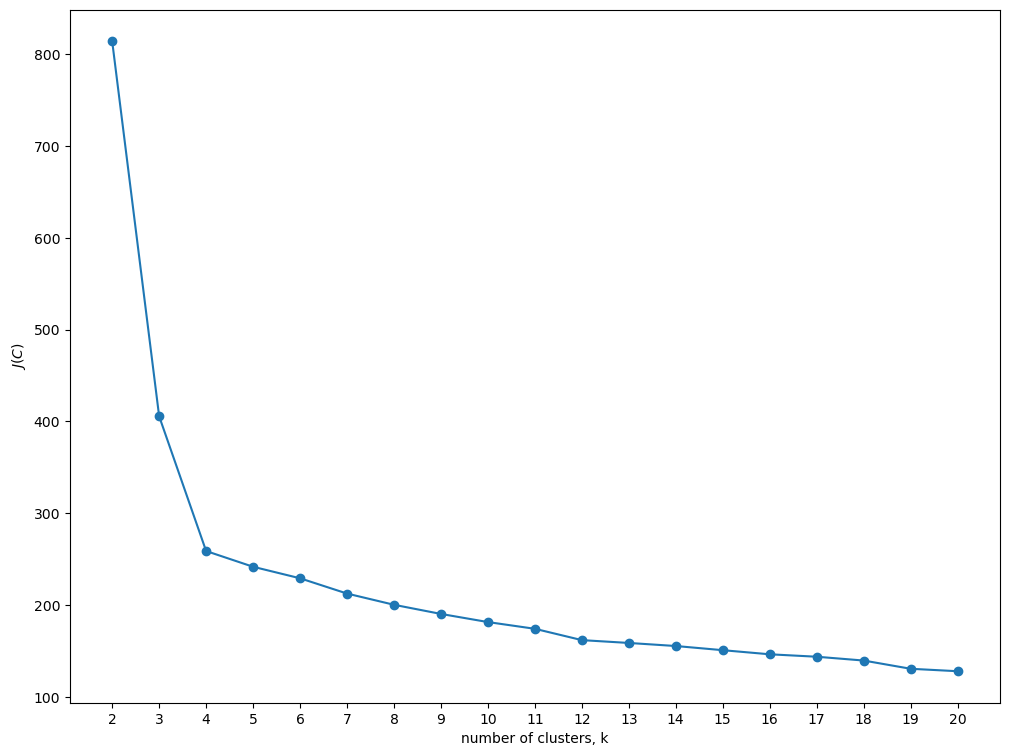

In [11]:
#set random state
RANDOM_STATE = 42
# call your function with a suitable range for k
# STUDENT CODE HERE
ks,losses=calculate_k_loss(X_blob,2, 20)
# STUDENT CODE until HERE
# Plot ks vs inertias
plt.plot(ks, losses, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('$ J(C)$')
plt.xticks(ks)
plt.show()

<div class="alert alert-block alert-success">
<b>Frage 3.4.17:</b> Welches Problem haben wir, wenn wir nur versuchen, den Verlust $J(C_k)$ zu minimieren?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Je mehr Zentren es gibt, desto näher liegen die Punkte natürlicherweise am Zentrum. Bei genauso vielen Zentren wie Datenpunkten ist der Loss minimal. Er konvergiert also bei steigender Zentrenzahl gegen 0.</div>



<div class="alert alert-block alert-success">
<b>Frage 3.4.18:</b> Was können wir tun, um dieses Problem zu vermeiden? Wie viele Cluster sollten wir dann in unserem Fall wählen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Wir suchen einen Punkt an dem der Loss weniger stark sinkt, also hier bei k=3 oder 4.</div>







Zusammenfassend lässt sich sagen, dass die Auswahl der Anzahl von Clustern typischerweise eine wage Kunst ist und es _sehr_ schwierig ist, aus der Ausführung von k-means etwas über die "wirkliche" Anzahl von Clustern in den Daten abzuleiten (tatsächlich sollten Sie dies niemals versuchen).

### Mean-Shift Clustering

Mean-Shift Clustering ist ein Schwerpunkt basierter Algorithmus. Hierbei wird der Schwerpunkt über das relative Auftreten der Datenpunkte definiert. Dies bedeutet in der Praxis, das kreisförige Strukturen gesucht werden, die so im Bild liegen, dass möglichst viele Datenpunkte in der Struktur liegen. Kritisch hierbei ist die Größe der Struktur, die auch als _Bandwith_ bezeichnet wird. In der Praxis werden ganz viele solcher Strukturen, die zufällig im Bild verteilt werden, berechnet und bei Überlappung verschmolzen. Dies hat den Vorteil, dass im Gegensatz zu k-Means die Anzahl an Clustern nicht vorgegeben werden muss. Dafür ist der Algorithmus langsamer.   

Gegeben sind nun die bereits bekannten Blob-Daten:

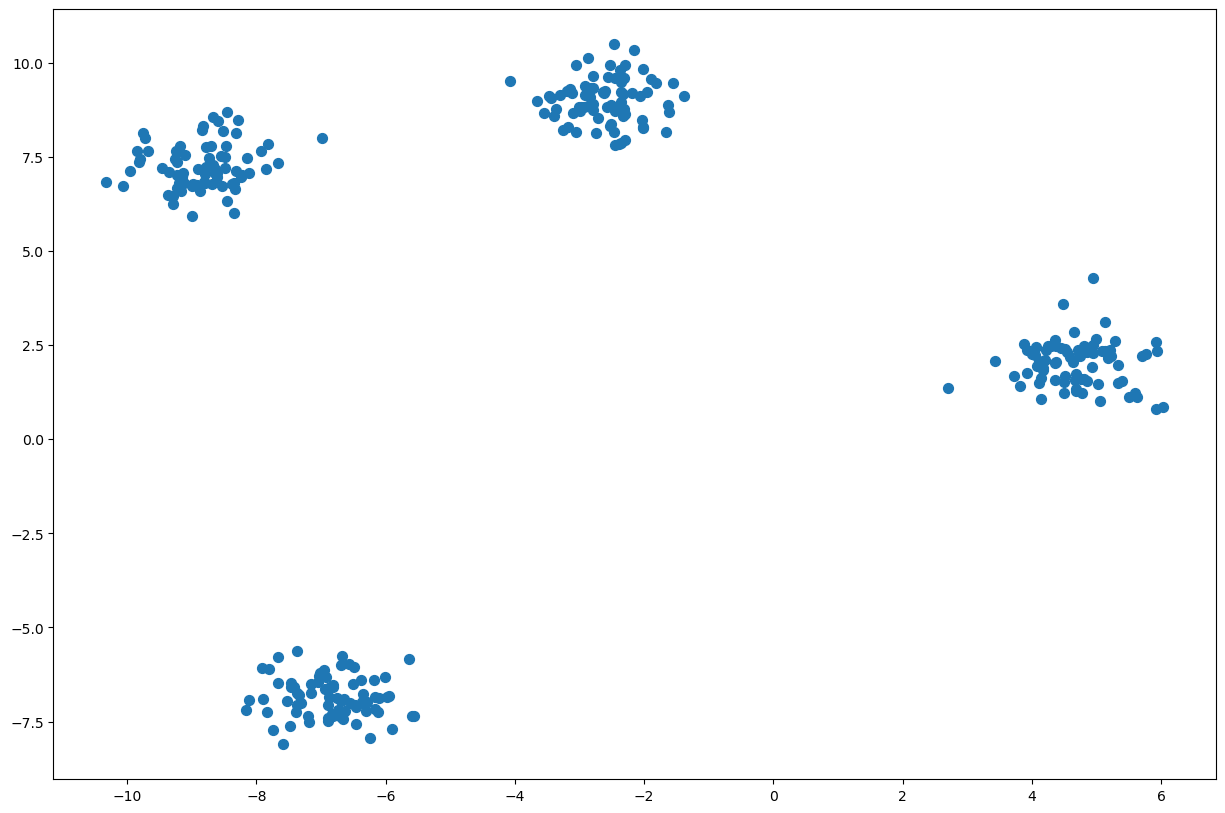

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
RANDOM_STATE = 42
X_blob, y_blob = make_blobs(
    n_samples=300, centers=4,cluster_std=0.60, random_state=RANDOM_STATE, shuffle=True
)
plt.figure(figsize=(15,10))
plt.scatter(X_blob[:, 0],X_blob[:, 1], s=50)
plt.show()

<div class="alert alert-block alert-success">
    <b>Aufgabe 3.4.19:</b> Verwenden Sie <code>sklearn</code> um die Daten mittels Mean-Shift Clustering zu Clustern und speichern Sie das Ergebnis in einer Variablen mit dem Namen <code>predicted_labels</code>.
    
    
_Hinweis: Verweden Sie <code>sklearn.cluster.MeanShift</code> und eine <code>bandwidth</code> von 4._
</div>

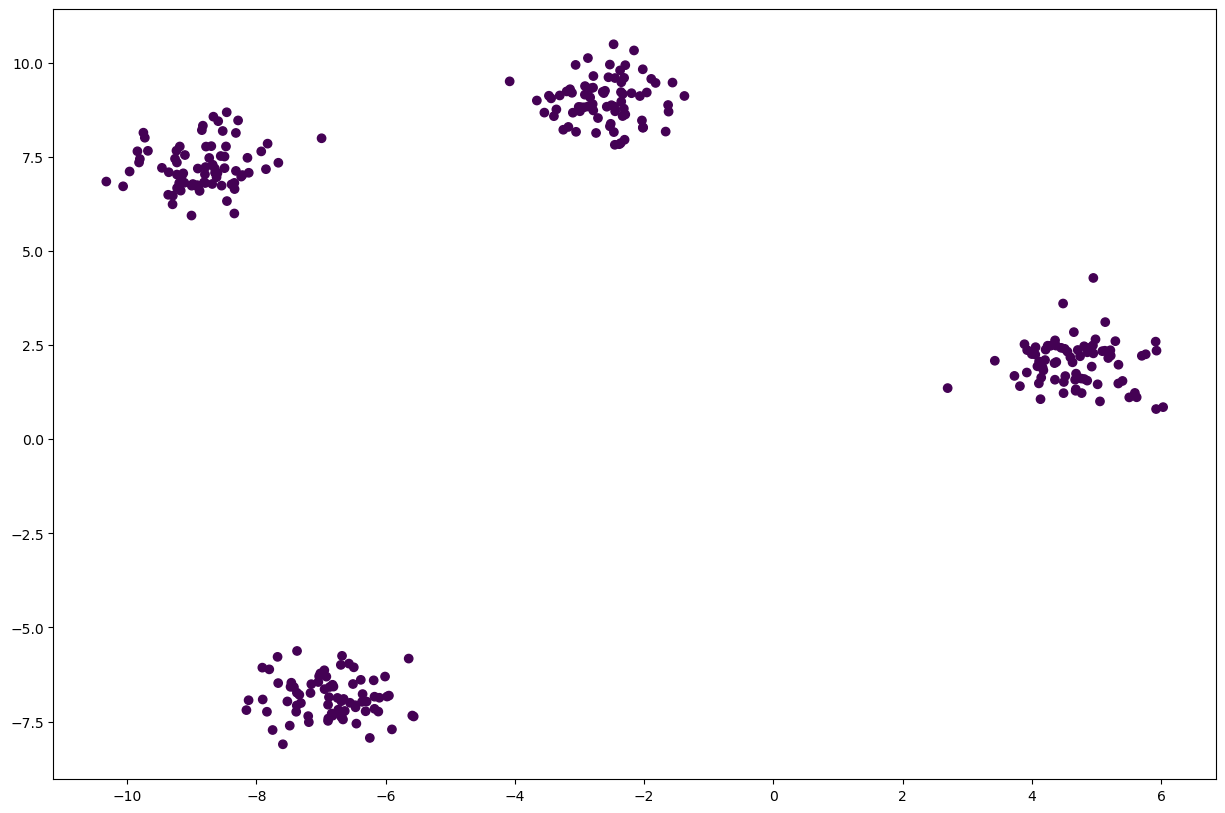

In [13]:
# STUDENT CODE HERE
from sklearn.cluster import MeanShift
result=MeanShift(bandwidth=40).fit(X_blob)
predicted_labels=result.labels_
# STUDENT CODE until HERE
plt.figure(figsize=(15,10))
plt.scatter(
    X_blob[:, 0], X_blob[:, 1], c=predicted_labels
)
plt.show()

<div class="alert alert-block alert-success">
    <b>Frage 3.4.20:</b> Was passiert, wenn Sie die <code>bandwith</code> auf 0.4 bzw. 40 statt 4 setzten
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Statt den 4 großen Clustern werden bei 0.4 ganz viele kleine Cluster erkannt. Bei 40 wird gar kein Cluster erkannt</div>


### DBSCAN

Auch DBSCAN arbeitet dichtebasiert. Diesem Verfahren liegt die Annahme zugrunde, dass Cluster Orte hoher Dichte sind, die durch Bereiche niedriger Dichte voneinander getrennt werden. Hierzu werden sogenannte _Core Samples_ bestimmt. Hierbei handelt es sich um Datenpunkte, die in einem sehr dichten Bereich liegen. Somit wird die Position eines Clusters von seinen Core Samples bestimmt. Daraus folgt ebenso, dass die Core Samples eines Clusters nah beieinander liegen. Anschließend werden die verbleibenden nicht - Core Samples dem naheliegensten Cluster zugewiesen, sofern diese nicht zu weit entfernt von den Core Samples liegen. Somit kann es Datenpunkte geben, die keinem Cluster zugeordnet werden.
DBSCAN besitzt i.d.R. zwei Parameter, nämlich:

1.) Die Mindestanzahl an Datenpunkte für einen Cluster sowie

2.) Epsilon, welches welches den maximalen Abstand zwischen zwei Datenpunkten, die im gleichen Cluster liegen, angibt.



Gegeben seien wieder die bekannten Blob-Daten:

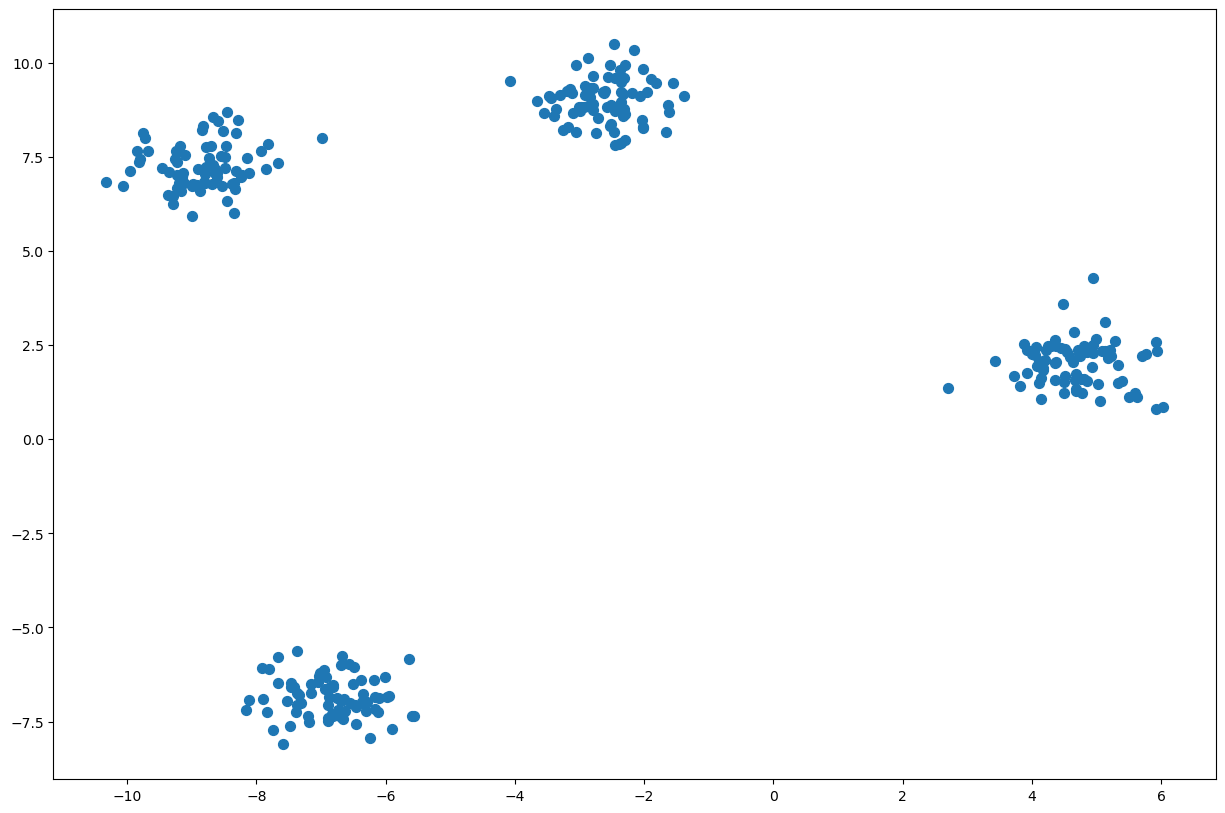

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
RANDOM_STATE = 42
X_blob, y_blob = make_blobs(
    n_samples=300, centers=4,cluster_std=0.60, random_state=RANDOM_STATE, shuffle=True
)
plt.figure(figsize=(15,10))
plt.scatter(X_blob[:, 0],X_blob[:, 1], s=50)
plt.show()

<div class="alert alert-block alert-success">
    <b>Aufgabe 3.4.21:</b> Verwenden Sie <code>sklearn</code> um die Daten mittels DBSCAN zu Clustern und speichern Sie das Ergebnis in einer Variablen mit dem Namen <code>predicted_labels</code>.
    
    
_Hinweis: Verweden Sie <code>sklearn.cluster.DBSCAN</code>, mit <code>eps=0.5</code> und <code>min_samples=5</code>_
</div>

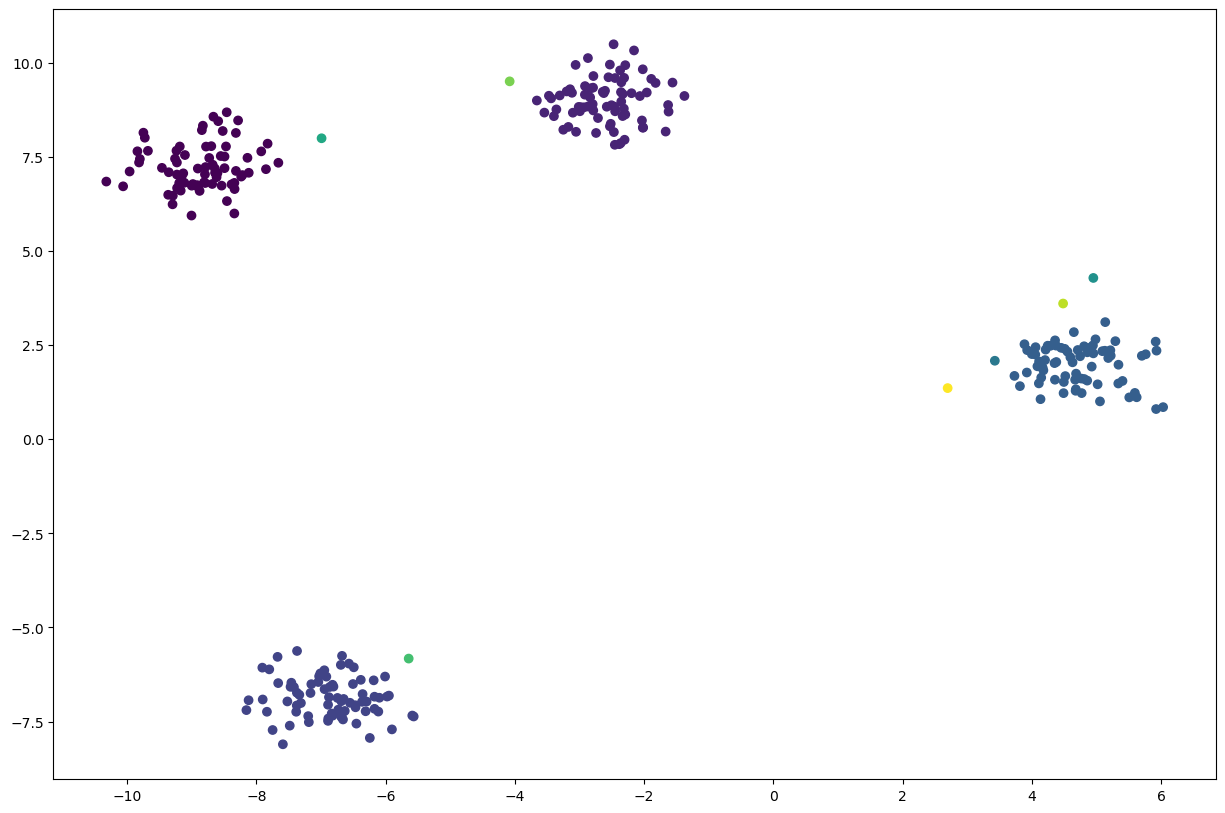

Number of classes: 11


In [15]:
# STUDENT CODE HERE
from sklearn.cluster import DBSCAN
result=DBSCAN(eps=0.5,min_samples=1).fit(X_blob)
predicted_labels=result.labels_
# STUDENT CODE until HERE
plt.figure(figsize=(15,10))
plt.scatter(
    X_blob[:, 0], X_blob[:, 1], c=predicted_labels
)
plt.show()
print('Number of classes: {}'.format(len(list(filter(lambda x: x != -1 , set(predicted_labels))))))

<div class="alert alert-block alert-success">
    <b>Frage 3.4.22:</b> Was passiert, wenn Sie die <code>min_samples</code> auf 1 bzw. 10 statt 5 setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Bei min_samples=1 werden alle Ausreißer als eigenes Cluster interpretiert. Bei min_samples=10 treten mehr Ausreißer auf. Um einem Cluster anzugehören muss ein Punkt nun 10 statt 5 Nachbarn im Cluster innerhalb der Epsilonumgebung haben. Weniger Punkte erfüllen dieses Kriterium, daher gibt es mehr unzugeordnete Punkte. </div>


<div class="alert alert-block alert-success">
    <b>Frage 3.4.23:</b> Was passiert, wenn Sie die <code>eps</code> auf 0.1 bzw. 1.0 statt 0.5 setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Bei epsilon=0.1 werden keine Cluster gefunden, da die Epsilonumgebung zu klein ist und kein Punkt das Kriterium ( eps, 5 Punkte) erfüllt. Bei epsilon=1 erfüllen mehr Punkte das Kriterium und es bleiben kaum Ausreißer übrig.  </div>


### HDBSCAN

HDBSCAN ist eine Erweiterung DBSCAN, bei dem, stark vereinfacht, die Berechnung von Epsilon sowie die Anzahl an Datenpunkten pro Cluster, auf Kosten der Laufzeit, automatisiert wurde.

Gegeben sei der bekannte Blob-Datensatz:

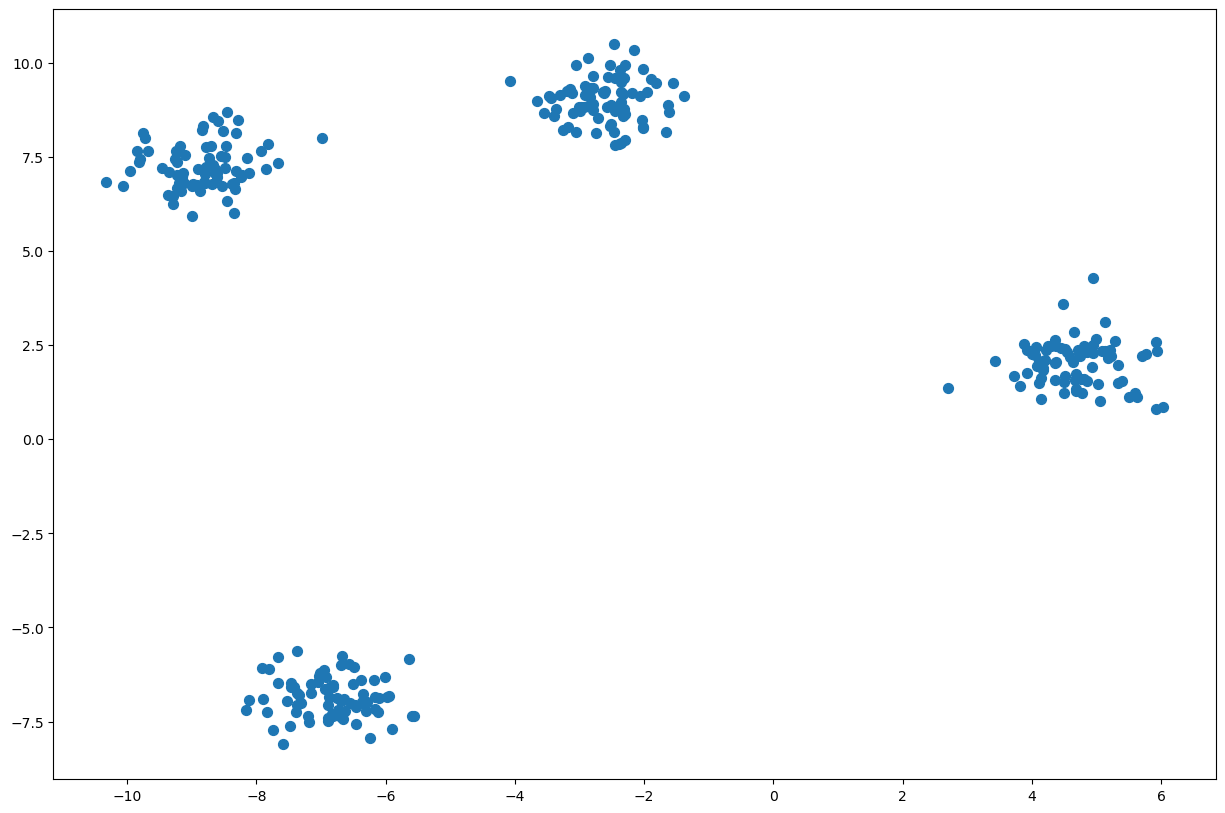

In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
RANDOM_STATE = 42
X_blob, y_blob = make_blobs(
    n_samples=300, centers=4,cluster_std=0.60, random_state=RANDOM_STATE, shuffle=True
)
plt.figure(figsize=(15,10))
plt.scatter(X_blob[:, 0],X_blob[:, 1], s=50)
plt.show()

<div class="alert alert-block alert-success">
    <b>Aufgabe 3.4.24:</b> Verwenden Sie <code>hdbscan</code> mit den Parametern <code>min_cluster_size=5</code> (minimale Anzahl an Datenpunkten die einen Cluster bilden) sowie <code>min_samples=None</code> (Steuert die Anzahl an DAtenpunkten, die keiner Klasse zugeordnet werden können), um die Daten mittels HDBSCAN zu Clustern und speichern Sie das Ergebnis in einer Variablen mit dem Namen <code>predicted_labels</code>.
    
    
_Hinweis: Verweden Sie <code>hdbscan.HDBSCAN</code>, welches das gleiche Interface wie die die vorherigen Methoden besitzt._
    
_Hinweis 2: Sollten Sie die Aufgabe lokal ausführen, müssen Sie die Bibliothek <code>hdbscan</code> installieren. Dies können Sie in der Anaconda Promt mittels "conda install -c conda-forge hdbscan" durchführen._
</div>

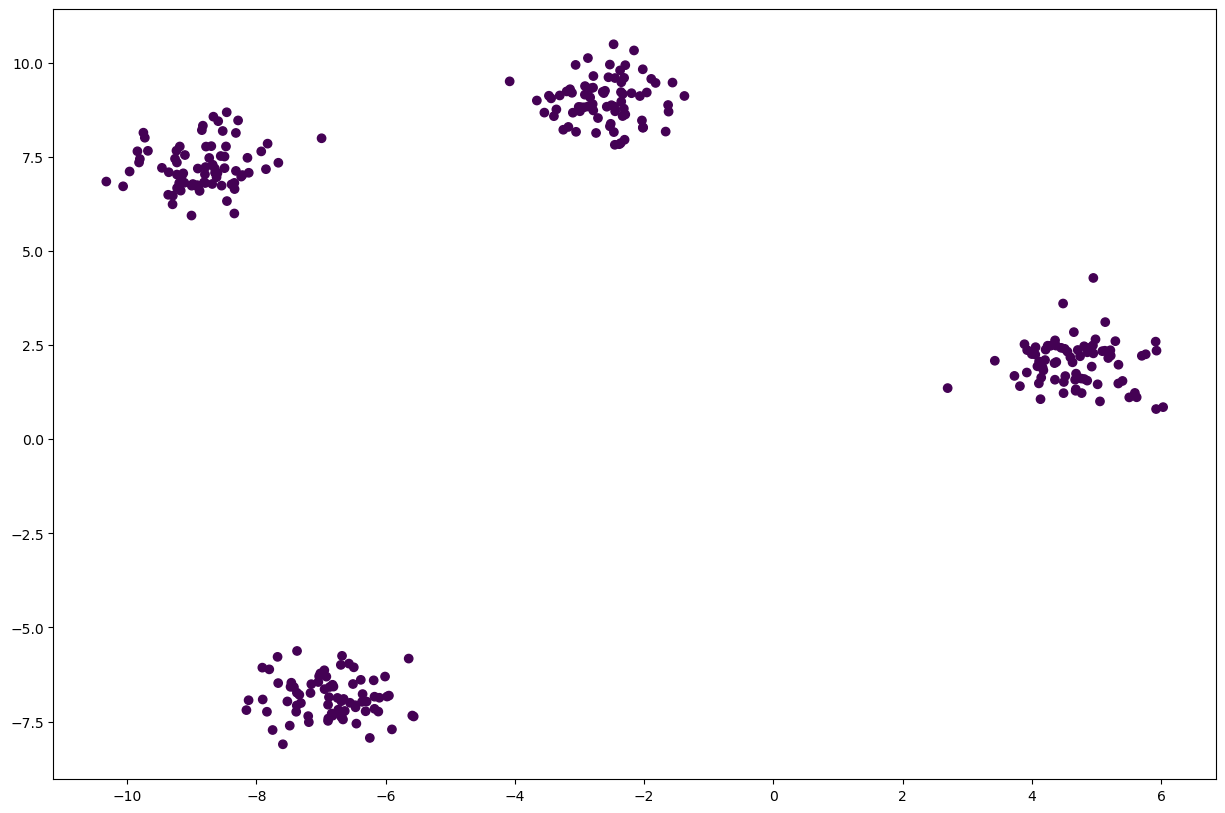

Number of classes: 0


In [17]:
from sklearn.cluster import HDBSCAN

# STUDENT CODE HERE
result=HDBSCAN(min_cluster_size=5,min_samples=100).fit(X_blob)
predicted_labels=result.labels_
# STUDENT CODE until HERE
plt.figure(figsize=(15,10))
plt.scatter(
    X_blob[:, 0], X_blob[:, 1], c=predicted_labels
)
plt.show()
print('Number of classes: {}'.format(len(list(filter(lambda x: x != -1 , set(predicted_labels))))))

<div class="alert alert-block alert-success">
    <b>Frage 3.4.25:</b> Was passiert, wenn Sie die <code>min_cluster_size</code> auf 10 bzw. 100 statt 5 setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b> Bei einem Wert von 100 werden erneut keine Cluster identifiziert. Bei 10 ändert sich nichts.</div>


<div class="alert alert-block alert-success">
    <b>Frage 3.4.26:</b> Was passiert, wenn Sie die <code>min_samples</code> auf 1, 10 bzw. 100 statt 5 setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b>Bei einer minimalen Samplezahl von 100 wird kein Cluster mehr erkannt. Davor wird der Algorithmus nicht eingeschränkt, da die Samplezahl vom Algorithmus bestimmt ist und anscheinend >10 ist</div>


### Praktische Anwendung - Bildkomprimierung

Im folgenden sollen die genannten Algorithmen praktisch an einem Beispielbild ausprobiert werden, d.h. wir werden im folgenden die Bildkompression mittels Clustering betrachten.

Das Ursprungsbild sieht wie folgt aus:

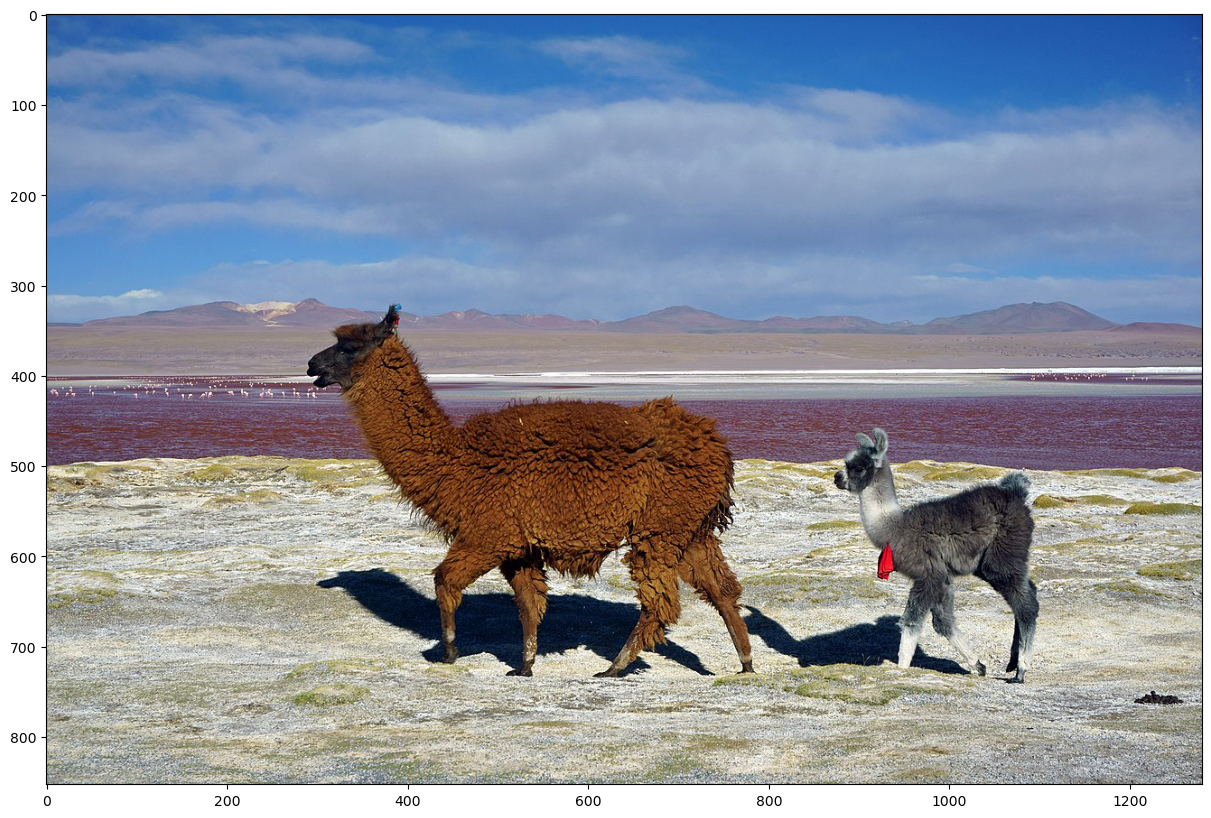

In [18]:
# NICHT ÄNDERN
from skimage import io
import os
import matplotlib.pyplot as plt 

path_to_image = os.path.join('images', 'Lamas_0.png')
image = io.imread(path_to_image)

plt.figure(figsize=(15,10))
plt.imshow(image)
plt.show()

Nun wird das gezeigte Bild mittels KMeans komprimiert.

**Achtung: Die Berechnung kann etwas Zeit in anspruch nehmen.**

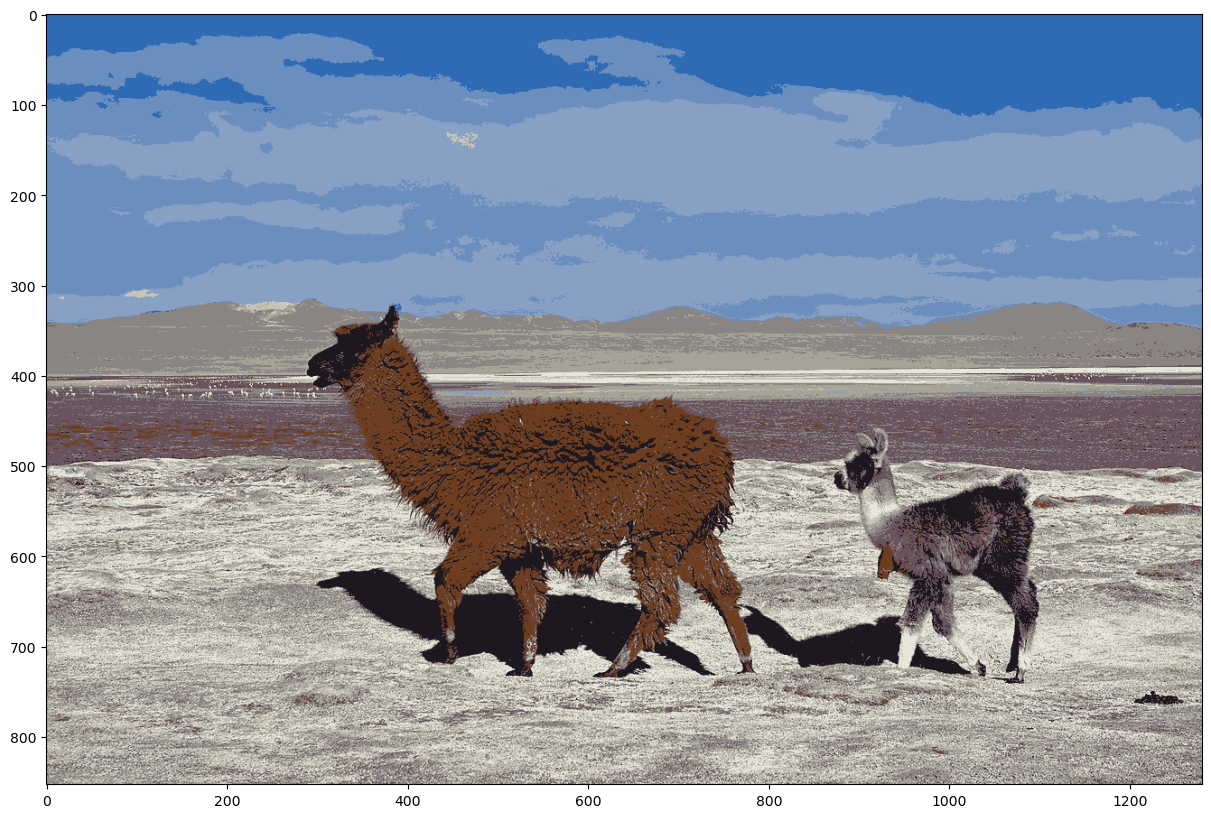

In [19]:
from skimage import img_as_float
from sklearn.cluster import  KMeans
import numpy as np

# Bild-Dimensionen
rows = image.shape[0]
cols = image.shape[1]

# Bilddimension ändern
image_reshaped = image.reshape(rows*cols, 4)

# k-means
model = KMeans(n_clusters=10)
model.fit(image_reshaped)

# neues Bild erzeugen
compressed_image = model.cluster_centers_[model.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

# In Ursprungsdimension konvertieren
compressed_image = compressed_image.reshape(rows, cols, 4)

plt.figure(figsize=(15,10))
plt.imshow(compressed_image)
plt.show()